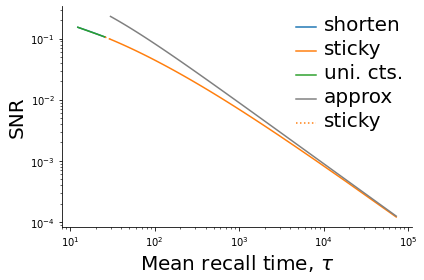

In [11]:
import numpy as np
import scipy.optimize as sco
import matplotlib as mpl
import matplotlib.pyplot as plt
import sl_py_tools.matplotlib_tricks as mpt


In [12]:
import complex_synapse.optimise.shorten as sh
import complex_synapse.optimise.sticky as st

In [13]:
np.r_[1 / st.beta_to_s(np.array(st.limits(4, True))), 1 / st.beta_to_s(np.array(st.limits(6, True)))]

converged 0.0
converged 0.0


array([ 8.02759766,         inf, 13.31377869,         inf])

array([0.77275966, 1.        ])

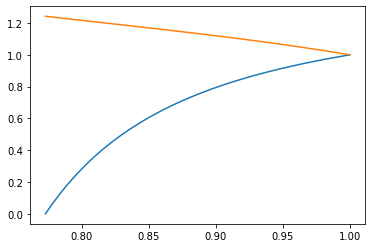

In [14]:
lims = 1 / np.exp(st.limits(10))
alphas = np.geomspace(lims[0], lims[1], 50)
epss = st.eps_stars(-np.log(alphas), 10)
plt.plot(alphas, epss[0], alphas, epss[1])
lims
# plt.ylim(-1, 5)

(0.0, 1.2)

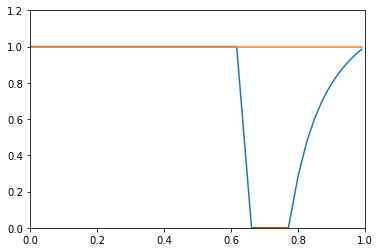

In [15]:
betas = np.geomspace(0.01, 20)
epss = st.eps_star(betas, 10)
epsss = st.eps_star_star(betas, 10)
plt.plot(np.exp(-betas), epss, np.exp(-betas), epsss)
plt.xlim(0, 1)
plt.ylim(0, 1.2)


In [16]:
sh.limits(10), tuple(1 / np.exp(st.limits(10)))

((0.6696958394100858, 0.7575703937158936), (0.7727596644682461, 1.0))

(-0.5, 4.0)

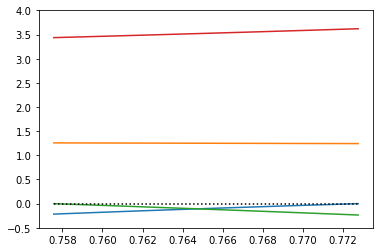

In [17]:
gap = (-np.log(sh.limits(10)[1]), st.limits(10)[0])
betas = np.linspace(*gap)
alphas = np.exp(-betas)
epss = st.eps_stars(betas, 10)
epsss = sh.eps_stars(alphas, 10)
eps = np.stack(epss + epsss).T
plt.plot(alphas, eps, alphas, np.zeros_like(alphas), 'k:')
plt.ylim(-.5, 4)

In [18]:
gap = (-np.log(sh.limits(10)[1]), st.limits(10)[0])
gapa = tuple(1 / np.exp(gap))
s_gap, a_gap, env_gap = st.envelope(10, 50, lims=gap)
sl_gap, al_gap, envl_gap = sh.envelope(10, 50, lims=gapa)

In [19]:
s, a,  env = st.envelope(10, 50)
cs, ca, cenv = sh.envelope(10, 50)

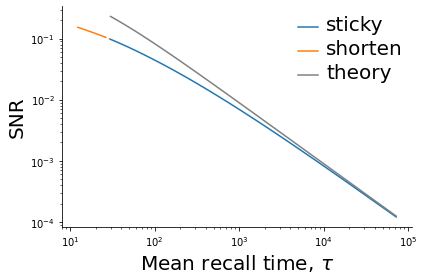

In [25]:
fig1, ax = plt.subplots()
ax.loglog(1 / s, s * a, label="sticky")
ax.loglog(1 / cs, cs * ca, label="shorten")
# ax.loglog(1 / sl_gap, sl_gap * al_gap, ':', label="uni", color='C0')
# ax.loglog(1 / cs, cs * cenv, label="uni. cts.")
ax.loglog(1 / s, s * env, label="theory", color='grey')
# ax.loglog(1 / s_gap, s_gap * env_gap, ':', label="approx", color='grey')
ax.loglog(1 / s_gap, s_gap * a_gap, ':', label="", color='C1')
# labels = [p[0].get_label() for p in ph]
ax.legend(loc=1)
# ax.set_xlim(0.5, 40)
# ax.set_ylim(0.1, 1)
ax.set_xlabel("Mean recall time, $\\tau$")
ax.set_ylabel("SNR")
mpt.clean_axes(ax)


In [26]:
fig1.savefig('../../Notes/Figures/sticky_opt.pdf')